# ML-II Lab 5 - CNN
---
## Jay Bhanushali - 60009200047

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import save_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.losses import categorical_crossentropy


11490434/11490434 [==============================] - 1s 0us/step
x_train shape:(60000, 28, 28)
y_train shape:(60000,)
y_train shape:(60000, 10)


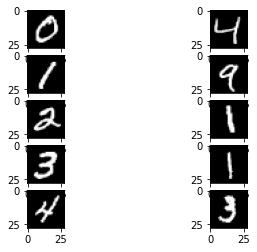

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")

# x_train= x_train.reshape(60000,28,28)
# x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train = to_categorical(y_train,10)

print(f"y_train shape:{y_train.shape}")
y_test = to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(1,11):
  plt.subplot(5,2,i)
  plt.imshow(x_train[i],cmap='gray')

### Hyperparameters

In [3]:
x_train /= 255
x_test /=255
batch_size=64 
num_classes=10 
epochs=2
optimizers = ['Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'SGD'] 

### Function to Build the Model

In [4]:
def build_model(optimizer): 

  model=Sequential()

  # 1st conv layer and 1st pooling
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) 
  model.add(MaxPooling2D(pool_size=(2,2))) 

  # 2nd conv layer and 2nd pooling
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2,2))) 
  model.add(Dropout(0.5)) 

  # Flattening
  model.add(Flatten()) 

  # Densly connected layer
  model.add(Dense(256, activation='relu')) 
  model.add(Dropout(0.5)) 

  # last layer
  model.add(Dense(num_classes, activation='softmax')) 

  # model compilatioon
  model.compile(loss=categorical_crossentropy, optimizer= optimizer, metrics=['accuracy']) 

  # print summary of the model
  # model.summary()

  return model

### Adam

In [5]:
adam = build_model('Adam')
adam.summary()
plot_model(adam, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=adam.fit(x_train, y_train, batch_size=batch_size, epochs=5, verbose=1, validation_data=(x_test,y_test)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [6]:
hist.history

{'loss': [0.30186939239501953,
  0.11497661471366882,
  0.08942882716655731,
  0.0794670581817627,
  0.0693206787109375],
 'accuracy': [0.9043166637420654,
  0.9642500281333923,
  0.9717833399772644,
  0.9749000072479248,
  0.9784166812896729],
 'val_loss': [0.06084666773676872,
  0.043421559035778046,
  0.03668605163693428,
  0.03403635695576668,
  0.028643792495131493],
 'val_accuracy': [0.9800000190734863,
  0.9846000075340271,
  0.987500011920929,
  0.9889000058174133,
  0.9894999861717224]}

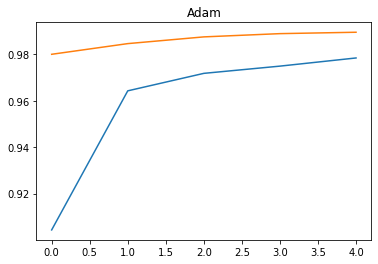

In [7]:
plt.title('Adam')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

### Adadelta

Epoch 1/3
938/938 [==============================] - 62s 66ms/step - loss: 2.3173 - accuracy: 0.1085 - val_loss: 2.2915 - val_accuracy: 0.1685
Epoch 2/3
938/938 [==============================] - 54s 57ms/step - loss: 2.2994 - accuracy: 0.1230 - val_loss: 2.2727 - val_accuracy: 0.2477
Epoch 3/3
938/938 [==============================] - 53s 57ms/step - loss: 2.2822 - accuracy: 0.1454 - val_loss: 2.2540 - val_accuracy: 0.3414


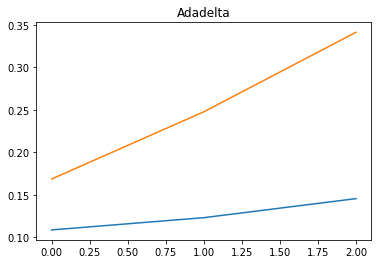

In [8]:
adadelta = build_model('Adadelta') 

hist=adadelta.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test,y_test)) 

plt.title('Adadelta')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) 

### Adagrad

Epoch 1/3
938/938 [==============================] - 53s 56ms/step - loss: 2.2421 - accuracy: 0.1822 - val_loss: 2.0572 - val_accuracy: 0.6364
Epoch 2/3
938/938 [==============================] - 55s 59ms/step - loss: 1.8309 - accuracy: 0.4013 - val_loss: 1.1393 - val_accuracy: 0.7812
Epoch 3/3
938/938 [==============================] - 54s 57ms/step - loss: 1.2794 - accuracy: 0.5780 - val_loss: 0.6970 - val_accuracy: 0.8434


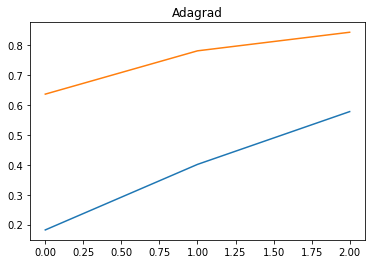

In [9]:
adagrad = build_model('Adagrad') 

hist=adagrad.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test,y_test)) 

plt.title('Adagrad')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) 

### RMSprop

Epoch 1/3
938/938 [==============================] - 57s 60ms/step - loss: 0.2879 - accuracy: 0.9095 - val_loss: 0.0701 - val_accuracy: 0.9792
Epoch 2/3
938/938 [==============================] - 57s 61ms/step - loss: 0.1145 - accuracy: 0.9640 - val_loss: 0.0458 - val_accuracy: 0.9850
Epoch 3/3
938/938 [==============================] - 56s 59ms/step - loss: 0.0975 - accuracy: 0.9701 - val_loss: 0.0393 - val_accuracy: 0.9865


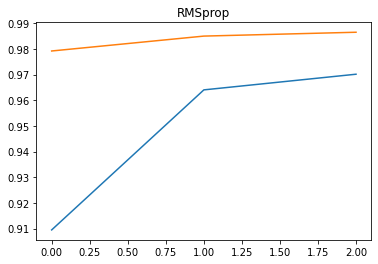

In [10]:
rmsprop = build_model('RMSprop') 

hist=rmsprop.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test,y_test)) 

plt.title('RMSprop')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) 

### SGD

Epoch 1/3
938/938 [==============================] - 54s 57ms/step - loss: 1.4715 - accuracy: 0.4947 - val_loss: 0.3778 - val_accuracy: 0.9061
Epoch 2/3
938/938 [==============================] - 54s 58ms/step - loss: 0.5300 - accuracy: 0.8299 - val_loss: 0.2018 - val_accuracy: 0.9460
Epoch 3/3
938/938 [==============================] - 55s 58ms/step - loss: 0.3740 - accuracy: 0.8828 - val_loss: 0.1514 - val_accuracy: 0.9560


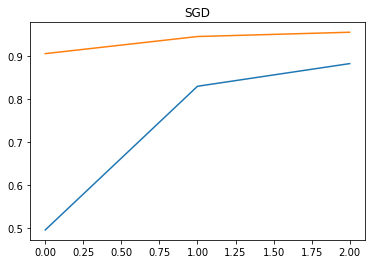

In [11]:
sgd = build_model('SGD') 

hist=sgd.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test,y_test)) 

plt.title('SGD')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) 

### Save the model

In [12]:
save_model(adam, 'mnist.h5', save_format='h5')

### Load model and predict

In [13]:
def predict_img(model, img):
  img = cv2.resize(img, (28,28))
  # img = img.astype('float32') / 255
  img = np.reshape(img, (1,28,28))
  pred = model.predict(img, verbose=0)
  # print(pred)
  # print("Predicted Class: ", np.argmax(pred))
  return pred, np.argmax(pred)

Predictions: [[2.2310501e-06 4.9726864e-06 9.9999273e-01 2.1408959e-09 4.4321571e-11
  1.4489078e-11 3.7194623e-09 3.1690699e-09 2.1409621e-08 5.4815887e-12]]
Predicted Class: 2


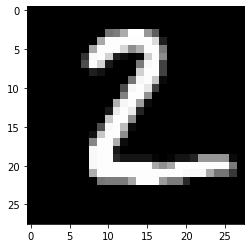

In [14]:
img = x_test[1]
plt.imshow(img, cmap='gray')
pred, class_pred = predict_img(adam, img)
print(f"Predictions: {pred}\nPredicted Class: {class_pred}")

In [15]:
np.argmax(y_test[1])

2

In [66]:
arr = []
for i in range(y_test.shape[0]):
  img = x_test[i]
  # plt.imshow(img, cmap='gray')
  pred, class_pred = predict_img(adam, img)
  arr.append(class_pred == np.argmax(y_test[i]))
# print(arr)
print(f"Accuracy: {sum(arr)/len(arr)*100}%")

Accuracy: 98.95%


In [57]:
y_test_classes = []
for row in y_test:
  y_test_classes.append( np.argmax(row) )

np.array(y_test_classes)

array([7, 2, 1, ..., 4, 5, 6])

In [59]:
predictions_classes = []
for row in y_test:
  predictions_classes.append( np.argmax(row) )

np.array(predictions_classes)

array([7, 2, 1, ..., 4, 5, 6])

In [62]:
cm = tf.math.confusion_matrix(labels=np.array(y_test_classes), predictions=np.array(predictions_classes))

In [61]:
import seaborn as sns

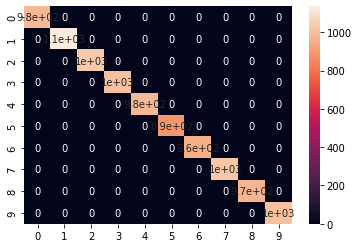

In [63]:
sns.heatmap(cm, annot=True)